# LOADING DATASET

In [64]:
import io
import os
import pandas as pd
path = './data/'
read_csv = os.path.join(path, "N_Realestate.csv")
df = pd.read_csv(read_csv , na_values = ['NA' , '?'])
df.set_index('No', inplace=True)
df.head(10)





,X1_transaction_date,X2_house_age,X3_distance_to_the_nearest_MRT_station,X4_number_of_convenience_stores,X5_latitude,X6_longitude,Y_house_price_of_unit_area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8


In [20]:
df.describe()

,X1_transaction_date,X2_house_age,X3_distance_to_the_nearest_MRT_station,X4_number_of_convenience_stores,X5_latitude,X6_longitude,Y_house_price_of_unit_area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 7 columns):
X1_transaction_date                       414 non-null float64
X2_house_age                              414 non-null float64
X3_distance_to_the_nearest_MRT_station    414 non-null float64
X4_number_of_convenience_stores           414 non-null int64
X5_latitude                               414 non-null float64
X6_longitude                              414 non-null float64
Y_house_price_of_unit_area                414 non-null float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


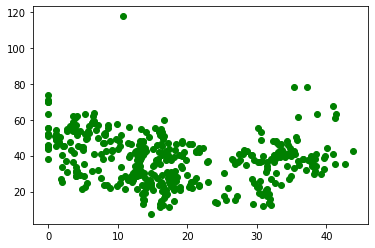

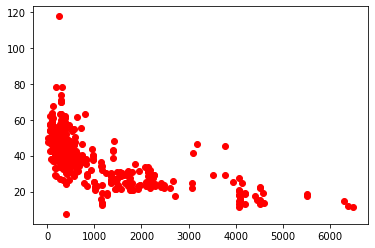

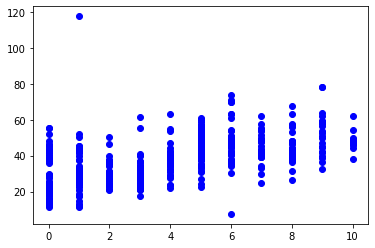

In [61]:
#Scatter plot between house age and house pricing
import matplotlib.pyplot as plt
y = df['Y_house_price_of_unit_area']
x= df['X2_house_age']
X = np.array(x)
Y = np.array(y)
plt.scatter(X,Y ,color ="green" )
plt.show()
#Scatter plot between distance to the nearest MRT station and house pricing
x=df['X3_distance_to_the_nearest_MRT_station']
y = df['Y_house_price_of_unit_area']
X = np.array(x)
Y = np.array(y)
plt.scatter(X,Y ,color ="red")
plt.show()
#Scatter plot between number_of_convenience_stores and house pricing
x=df['X4_number_of_convenience_stores']
y = df['Y_house_price_of_unit_area']
X = np.array(x)
Y = np.array(y)
plt.scatter(X,Y ,color ="blue")
plt.show()

# TRAINING THE MODEL

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics

path = './data/'
read_csv = os.path.join(path, "N_Realestate.csv")
df = pd.read_csv(read_csv)

df.set_index('No', inplace=True)

x = df[['X1_transaction_date','X2_house_age','X3_distance_to_the_nearest_MRT_station','X4_number_of_convenience_stores','X5_latitude','X6_longitude']].values
y = df['Y_house_price_of_unit_area'].values
model = Sequential()
model.add(Dense(35, input_dim=x.shape[1], activation='relu')) # input
model.add(Dense(15, activation='relu')) # Hidden 2
model.add(Dense(8, activation='relu'))#Hidden 3
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x,y,verbose=2,epochs=600) 

Epoch 1/600
414/414 - 1s - loss: 23907.2822
Epoch 2/600
414/414 - 0s - loss: 3831.3745
Epoch 3/600
414/414 - 0s - loss: 1134.7453
Epoch 4/600
414/414 - 0s - loss: 614.3777
Epoch 5/600
414/414 - 0s - loss: 290.3125
Epoch 6/600
414/414 - 0s - loss: 231.7863
Epoch 7/600
414/414 - 0s - loss: 160.1998
Epoch 8/600
414/414 - 0s - loss: 125.8411
Epoch 9/600
414/414 - 0s - loss: 109.0203
Epoch 10/600
414/414 - 0s - loss: 97.7611
Epoch 11/600
414/414 - 0s - loss: 90.1321
Epoch 12/600
414/414 - 0s - loss: 84.9454
Epoch 13/600
414/414 - 0s - loss: 82.2071
Epoch 14/600
414/414 - 0s - loss: 80.8946
Epoch 15/600
414/414 - 0s - loss: 80.3847
Epoch 16/600
414/414 - 0s - loss: 79.7691
Epoch 17/600
414/414 - 0s - loss: 79.2281
Epoch 18/600
414/414 - 0s - loss: 78.4331
Epoch 19/600
414/414 - 0s - loss: 78.2650
Epoch 20/600
414/414 - 0s - loss: 77.8406
Epoch 21/600
414/414 - 0s - loss: 77.8872
Epoch 22/600
414/414 - 0s - loss: 77.2037
Epoch 23/600
414/414 - 0s - loss: 77.0270
Epoch 24/600
414/414 - 0s - lo

Epoch 194/600
414/414 - 0s - loss: 68.0941
Epoch 195/600
414/414 - 0s - loss: 68.0969
Epoch 196/600
414/414 - 0s - loss: 66.5037
Epoch 197/600
414/414 - 0s - loss: 67.3972
Epoch 198/600
414/414 - 0s - loss: 69.2097
Epoch 199/600
414/414 - 0s - loss: 68.8114
Epoch 200/600
414/414 - 0s - loss: 67.9709
Epoch 201/600
414/414 - 0s - loss: 68.1731
Epoch 202/600
414/414 - 0s - loss: 67.6616
Epoch 203/600
414/414 - 0s - loss: 69.2716
Epoch 204/600
414/414 - 0s - loss: 68.0763
Epoch 205/600
414/414 - 0s - loss: 66.4701
Epoch 206/600
414/414 - 0s - loss: 66.2373
Epoch 207/600
414/414 - 0s - loss: 70.5901
Epoch 208/600
414/414 - 0s - loss: 72.1987
Epoch 209/600
414/414 - 0s - loss: 73.5011
Epoch 210/600
414/414 - 0s - loss: 69.4019
Epoch 211/600
414/414 - 0s - loss: 67.0345
Epoch 212/600
414/414 - 0s - loss: 66.7268
Epoch 213/600
414/414 - 0s - loss: 65.8899
Epoch 214/600
414/414 - 0s - loss: 67.0705
Epoch 215/600
414/414 - 0s - loss: 68.2621
Epoch 216/600
414/414 - 0s - loss: 69.2627
Epoch 217/6

Epoch 385/600
414/414 - 0s - loss: 69.4812
Epoch 386/600
414/414 - 0s - loss: 65.3796
Epoch 387/600
414/414 - 0s - loss: 64.9400
Epoch 388/600
414/414 - 0s - loss: 67.1934
Epoch 389/600
414/414 - 0s - loss: 69.2875
Epoch 390/600
414/414 - 0s - loss: 67.6674
Epoch 391/600
414/414 - 0s - loss: 69.6252
Epoch 392/600
414/414 - 0s - loss: 78.6991
Epoch 393/600
414/414 - 0s - loss: 74.5063
Epoch 394/600
414/414 - 0s - loss: 68.0464
Epoch 395/600
414/414 - 0s - loss: 71.3233
Epoch 396/600
414/414 - 0s - loss: 65.8020
Epoch 397/600
414/414 - 0s - loss: 64.9263
Epoch 398/600
414/414 - 0s - loss: 65.2842
Epoch 399/600
414/414 - 0s - loss: 68.5789
Epoch 400/600
414/414 - 0s - loss: 68.7964
Epoch 401/600
414/414 - 0s - loss: 65.0977
Epoch 402/600
414/414 - 0s - loss: 62.5591
Epoch 403/600
414/414 - 0s - loss: 68.8367
Epoch 404/600
414/414 - 0s - loss: 63.8023
Epoch 405/600
414/414 - 0s - loss: 73.1455
Epoch 406/600
414/414 - 0s - loss: 75.2934
Epoch 407/600
414/414 - 0s - loss: 67.1330
Epoch 408/6

Epoch 576/600
414/414 - 0s - loss: 66.4472
Epoch 577/600
414/414 - 0s - loss: 64.8309
Epoch 578/600
414/414 - 0s - loss: 62.5789
Epoch 579/600
414/414 - 0s - loss: 65.9835
Epoch 580/600
414/414 - 0s - loss: 64.4961
Epoch 581/600
414/414 - 0s - loss: 66.7341
Epoch 582/600
414/414 - 0s - loss: 73.9203
Epoch 583/600
414/414 - 0s - loss: 66.4665
Epoch 584/600
414/414 - 0s - loss: 62.8275
Epoch 585/600
414/414 - 0s - loss: 63.0856
Epoch 586/600
414/414 - 0s - loss: 63.3694
Epoch 587/600
414/414 - 0s - loss: 67.2307
Epoch 588/600
414/414 - 0s - loss: 68.5393
Epoch 589/600
414/414 - 0s - loss: 62.8793
Epoch 590/600
414/414 - 0s - loss: 63.1573
Epoch 591/600
414/414 - 0s - loss: 63.9983
Epoch 592/600
414/414 - 0s - loss: 76.8437
Epoch 593/600
414/414 - 0s - loss: 67.3668
Epoch 594/600
414/414 - 0s - loss: 68.4552
Epoch 595/600
414/414 - 0s - loss: 80.4322
Epoch 596/600
414/414 - 0s - loss: 64.4368
Epoch 597/600
414/414 - 0s - loss: 64.2688
Epoch 598/600
414/414 - 0s - loss: 64.6859
Epoch 599/6

In [49]:
pred = model.predict(x)
pred

array([[53.355648],
       [49.221573],
       [43.692085],
       [43.69084 ],
       [46.700806],
       [28.533918],
       [39.329693],
       [48.760876],
       [11.882318],
       [26.851055],
       [35.52202 ],
       [55.482395],
       [43.33858 ],
       [27.061922],
       [29.72415 ],
       [36.751617],
       [56.375927],
       [42.523907],
       [45.227306],
       [49.88846 ],
       [29.246058],
       [53.769947],
       [29.981272],
       [53.91666 ],
       [35.934517],
       [24.941359],
       [47.93808 ],
       [52.967567],
       [41.723633],
       [44.630997],
       [14.392968],
       [39.379345],
       [35.213825],
       [47.607822],
       [49.99773 ],
       [16.350107],
       [26.923555],
       [30.962091],
       [46.837074],
       [49.72602 ],
       [16.20585 ],
       [16.804338],
       [37.490665],
       [38.284668],
       [45.88096 ],
       [38.37732 ],
       [42.517612],
       [37.473915],
       [14.153604],
       [14.577416],


In [50]:
# RMS difference between predicted and the  actual output
pred = model.predict(x)
score = np.sqrt(metrics.mean_squared_error(pred,y))
score

7.871921489051746

# EARLY STOPPING

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping


path = './data/'

read_csv = os.path.join(path, "N_Realestate.csv")
df = pd.read_csv(read_csv)

df.set_index('No', inplace=True)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

x = df[['X1_transaction_date','X2_house_age','X3_distance_to_the_nearest_MRT_station','X4_number_of_convenience_stores','X5_latitude','X6_longitude']].values
y = df['Y_house_price_of_unit_area'].values
model = Sequential()
model.add(Dense(35, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(15, activation='relu')) # Hidden 2
model.add(Dense(8, activation='relu'))# Hidden 3
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1, patience=20, verbose=1, mode='auto')
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=700)


Train on 310 samples, validate on 104 samples
Epoch 1/700
310/310 - 3s - loss: 213949.4273 - val_loss: 29961.4754
Epoch 2/700
310/310 - 0s - loss: 22437.7658 - val_loss: 30370.0538
Epoch 3/700
310/310 - 0s - loss: 17596.4639 - val_loss: 5605.7233
Epoch 4/700
310/310 - 0s - loss: 1754.5121 - val_loss: 2154.5623
Epoch 5/700
310/310 - 0s - loss: 1964.1781 - val_loss: 1400.1860
Epoch 6/700
310/310 - 0s - loss: 864.2093 - val_loss: 523.4072
Epoch 7/700
310/310 - 0s - loss: 526.8344 - val_loss: 630.0453
Epoch 8/700
310/310 - 0s - loss: 460.0741 - val_loss: 399.8618
Epoch 9/700
310/310 - 0s - loss: 361.5494 - val_loss: 350.1844
Epoch 10/700
310/310 - 0s - loss: 311.8699 - val_loss: 297.9088
Epoch 11/700
310/310 - 0s - loss: 273.3348 - val_loss: 266.8387
Epoch 12/700
310/310 - 0s - loss: 239.1900 - val_loss: 232.2443
Epoch 13/700
310/310 - 0s - loss: 211.8072 - val_loss: 201.7500
Epoch 14/700
310/310 - 0s - loss: 184.5468 - val_loss: 177.1067
Epoch 15/700
310/310 - 0s - loss: 160.7278 - val_lo

In [44]:
pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
score


8.054438528175718

# K FOLD VALIDATION

In [145]:
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import KFold,train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

path = './data/'
read_csv = os.path.join(path, "N_Realestate.csv")
df = pd.read_csv(read_csv)

df.set_index('No', inplace=True)
df['X1_transaction_date'] = zscore(df['X1_transaction_date'])
df['X2_house_age'] = zscore(df['X2_house_age'])
df['X3_distance_to_the_nearest_MRT_station'] = zscore(df['X3_distance_to_the_nearest_MRT_station'])
df['X4_number_of_convenience_stores'] = zscore(df['X4_number_of_convenience_stores'])
df['X5_latitude']=zscore(df['X5_latitude'])
df['X6_longitude']=zscore(df['X6_longitude'])

x = df[['X1_transaction_date','X2_house_age','X3_distance_to_the_nearest_MRT_station','X4_number_of_convenience_stores','X5_latitude','X6_longitude']].values
y = df['Y_house_price_of_unit_area'].values



# Cross-Validate
kf = KFold(5, shuffle=True, random_state=42) # Use for KFold classification
    
oos_y = []
oos_pred = []

fold = 0
for train, test in kf.split(x):
    fold+=1
    print(f"Fold #{fold}")
        
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    
    model = Sequential()
    model.add(Dense(20, input_dim=x.shape[1], activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    model.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=0,epochs=500)
    
    pred = model.predict(x_test)
    
    oos_y.append(y_test)
    oos_pred.append(pred)    

    # Measure this fold's RMSE
    score = np.sqrt(metrics.mean_squared_error(pred,y_test))
    print(f"Fold score (RMSE): {score}")

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_pred,oos_y))
print(f"Final, out of sample score (RMSE): {score}")    
       
# Write the cross-validated prediction
oos_y = pd.DataFrame(oos_y)
oos_pred = pd.DataFrame(oos_pred)
oosDF = pd.concat( [df, oos_y, oos_pred],axis=1 )
#oosDF.to_csv(filename_write,index=False)


Fold #1
Fold score (RMSE): 6.314650815458592
Fold #2
Fold score (RMSE): 8.289000968041128
Fold #3
Fold score (RMSE): 7.086220457301666
Fold #4
Fold score (RMSE): 7.4410772512170915
Fold #5
Fold score (RMSE): 10.221804958777717
Final, out of sample score (RMSE): 7.976961705215404


# BOOTSTRAPPING

In [13]:
import pandas as pd
import os
import numpy as np
import statistics
from scipy.stats import zscore
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import ShuffleSplit
path = './data/'
read_csv = os.path.join(path, "N_Realestate.csv")
df = pd.read_csv(read_csv)

df.set_index('No', inplace=True)
df['X1_transaction_date'] = zscore(df['X1_transaction_date'])
df['X2_house_age'] = zscore(df['X2_house_age'])
df['X3_distance_to_the_nearest_MRT_station'] = zscore(df['X3_distance_to_the_nearest_MRT_station'])
df['X4_number_of_convenience_stores'] = zscore(df['X4_number_of_convenience_stores'])
df['X5_latitude']=zscore(df['X5_latitude'])
df['X6_longitude']=zscore(df['X6_longitude'])

x = df[['X1_transaction_date','X2_house_age','X3_distance_to_the_nearest_MRT_station','X4_number_of_convenience_stores','X5_latitude','X6_longitude']].values
y = df['Y_house_price_of_unit_area'].values

SPLITS = 10

# Bootstrap
boot = ShuffleSplit(n_splits=SPLITS, test_size=0.1, random_state=42)

# Track progress
mean_benchmark = []
epochs_needed = []
num = 0

# Loop through samples
for train, test in boot.split(x):
    start_time = time.time()
    num+=1

    # Split train and test
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]

    # Construct neural network
    model = Sequential()
    model.add(Dense(20, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3,patience=5, verbose=0, mode='auto', restore_best_weights=True)

    # Train on the bootstrap sample
    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=0,epochs=1000)
    epochs = monitor.stopped_epoch
    epochs_needed.append(epochs)
     
    # Predict on the out of boot (validation)
    pred = model.predict(x_test)
  
    # Measure this bootstrap's log loss
    score = np.sqrt(metrics.mean_squared_error(pred,y_test))
    mean_benchmark.append(score)
    m1 = statistics.mean(mean_benchmark)
    m2 = statistics.mean(epochs_needed)
    mdev = statistics.pstdev(mean_benchmark)
    
    # Record this iteration

    print(f"#{num}: score={score:.6f}, mean score={m1:.6f}, stdev={mdev:.6f}, epochs={epochs}, mean epochs={int(m2)}")

#1: score=7.952934, mean score=7.952934, stdev=0.000000, epochs=120, mean epochs=120
#2: score=6.125242, mean score=7.039088, stdev=0.913846, epochs=101, mean epochs=110
#3: score=6.943344, mean score=7.007174, stdev=0.747516, epochs=66, mean epochs=95
#4: score=8.214979, mean score=7.309125, stdev=0.832231, epochs=92, mean epochs=94
#5: score=6.304143, mean score=7.108129, stdev=0.845982, epochs=127, mean epochs=101
#6: score=7.757633, mean score=7.216379, stdev=0.809318, epochs=125, mean epochs=105
#7: score=7.881980, mean score=7.311465, stdev=0.784648, epochs=140, mean epochs=110
#8: score=6.578020, mean score=7.219785, stdev=0.773014, epochs=74, mean epochs=105
#9: score=5.673601, mean score=7.047986, stdev=0.875942, epochs=101, mean epochs=105
#10: score=7.710396, mean score=7.114227, stdev=0.854422, epochs=86, mean epochs=103
